In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel('godigt_cc_data.xlsx')

In [3]:
df

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8443,8444,4262 41XX XXXX XXXX,426241,Visa,chartered,2010-01-10,A,1,1,1,...,47,0,0,0,0,0,T,108713,0,970000
8444,8445,37691 6XXXX XXXXX,376916,Amex,centurion,2006-07-19,A,0,1,1,...,52,0,0,0,0,0,T,42369,Salaried,200000
8445,8446,4375 51XX XXXX XXXX,437551,Visa,rewards,2006-02-15,D,0,1,1,...,36,0,0,0,0,0,T,8459,Retired,90000
8446,8447,4477 47XX XXXX XXXX,447747,Visa,indianoil,2003-11-06,C,0,0,0,...,54,1,0,0,0,0,T,57100,Salaried,210000


# Data profilling: size,shape,columns,data types

In [4]:
df.shape

(8448, 28)

In [5]:
df.size

236544

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [7]:
df.columns

Index(['userid', 'card_no', 'card_bin_no', 'Issuer', 'card_type',
       'card_source_date', 'high_networth', 'active_30', 'active_60',
       'active_90', 'cc_active30', 'cc_active60', 'cc_active90',
       'hotlist_flag', 'widget_products', 'engagement_products',
       'annual_income_at_source', 'other_bank_cc_holding', 'bank_vintage',
       'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity',
       'T+6_month_activity', 'T+12_month_activity', 'Transactor_revolver',
       'avg_spends_l3m', 'Occupation_at_source', 'cc_limit'],
      dtype='object')

# Duplicate values

In [8]:
# Check duplicate
df.duplicated().sum()

0

In [9]:
# Check the null values
df.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

# Null handling -Missing values

In [10]:
# Check the description to understand the range of values available within the columns
df.describe()

,userid,card_bin_no,card_source_date,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90,widget_products,engagement_products,annual_income_at_source,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,avg_spends_l3m,cc_limit
count,8448.00000,8448.000000,8448,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8.448000e+03,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000
mean,4224.50000,436747.044508,2009-06-19 13:35:17.045454592,0.292377,0.494792,0.642045,0.284091,0.484493,0.632339,3.614583,3.991122,1.674595e+06,33.164181,0.111269,0.047940,0.080374,0.008878,0.009470,49527.365530,251706.912879
min,1.00000,376916.000000,1998-07-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000950e+05,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2112.75000,426241.000000,2004-01-07 18:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.061104e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17110.000000,90000.000000
50%,4224.50000,437551.000000,2009-05-24 12:00:00,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,1.372134e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37943.000000,150000.000000
75%,6336.25000,438439.000000,2014-11-27 06:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,1.881734e+06,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66095.750000,350000.000000
max,8448.00000,524178.000000,2020-06-17 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,8.000000,4.999508e+06,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,289292.000000,990000.000000
std,2438.87187,30489.752417,NaN,0.454881,0.500002,0.479427,0.451007,0.499789,0.482197,2.273193,2.572135,1.064307e+06,15.868344,0.314483,0.213653,0.271888,0.093809,0.096856,46244.954836,229114.856385


In [11]:
# Check the value counts of Transactor_revolver column
df.Transactor_revolver.value_counts()

Transactor_revolver
T    7115
R    1295
Name: count, dtype: int64

In [12]:
### Check descripancies
df.Transactor_revolver.unique()

array(['T', 'R', nan], dtype=object)

In [13]:
#Most frequent value of Transactor_revolver column is T so we can fill all null values with T
df.Transactor_revolver=df.Transactor_revolver.fillna('T')

In [14]:
# Check the null values
df.isnull().sum()

userid                     0
card_no                    0
card_bin_no                0
Issuer                     0
card_type                  0
card_source_date           0
high_networth              0
active_30                  0
active_60                  0
active_90                  0
cc_active30                0
cc_active60                0
cc_active90                0
hotlist_flag               0
widget_products            0
engagement_products        0
annual_income_at_source    0
other_bank_cc_holding      0
bank_vintage               0
T+1_month_activity         0
T+2_month_activity         0
T+3_month_activity         0
T+6_month_activity         0
T+12_month_activity        0
Transactor_revolver        0
avg_spends_l3m             0
Occupation_at_source       0
cc_limit                   0
dtype: int64

In [15]:
# Check all the categorical column's values
df.card_no.unique()

array(['4384 39XX XXXX XXXX', '4377 48XX XXXX XXXX',
       '4258 06XX XXXX XXXX', '5241 78XX XXXX XXXX',
       '4055 33XX XXXX XXXX', '4375 51XX XXXX XXXX',
       '4386 28XX XXXX XXXX', '4262 41XX XXXX XXXX', '37694 5XXXX XXXXX',
       '4477 47XX XXXX XXXX', '37691 6XXXX XXXXX'], dtype=object)

In [16]:
df.Issuer.unique()                       

array(['Visa', 'Mastercard', 'Amex'], dtype=object)

In [17]:
df.card_type.unique()            

array(['edge', 'prosperity', 'rewards', 'indianoil', 'cashback',
       'shoprite', 'chartered', 'aura', 'gold', 'smartearn', 'prime',
       'pulse', 'platinum', 'centurion', 'elite'], dtype=object)

In [18]:
df.high_networth.unique()     

array(['B', 'A', 'C', 'E', 'D'], dtype=object)

In [19]:
df.hotlist_flag.unique()

array(['N', 'Y'], dtype=object)

In [20]:
df.other_bank_cc_holding.unique()   

array(['Y', 'N'], dtype=object)

In [21]:
df.Transactor_revolver.unique()

array(['T', 'R'], dtype=object)

In [22]:
df.Occupation_at_source.unique()     

array(['Self Employed', 0, 'Student', 'Salaried', 'Retired', 'Housewife'],
      dtype=object)

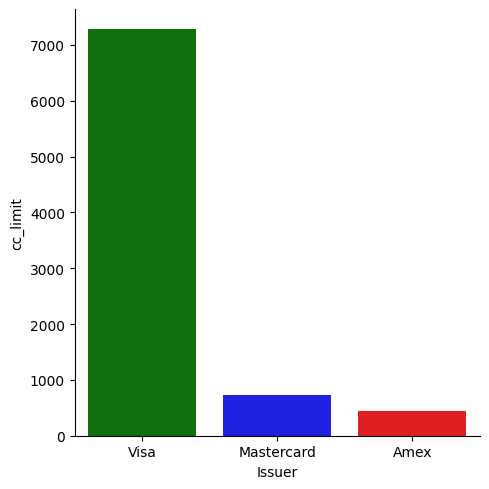

In [23]:
sns.catplot(df,x=df.Issuer,y=df.cc_limit,kind='bar',errorbar=None,estimator='count', palette=['green', 'blue','red'])

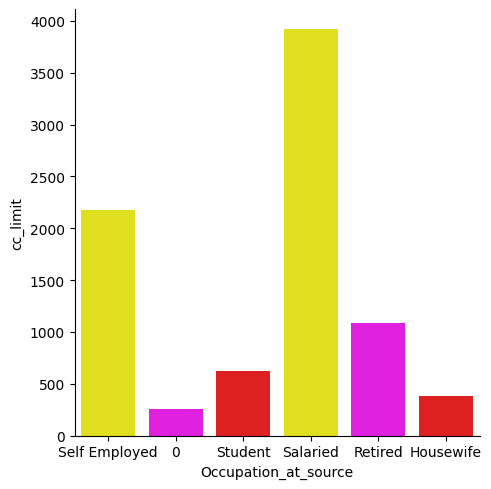

In [24]:
sns.catplot(df,x=df.Occupation_at_source,y=df.cc_limit,kind='bar',errorbar=None,estimator='count', palette=['yellow', 'magenta','red'])

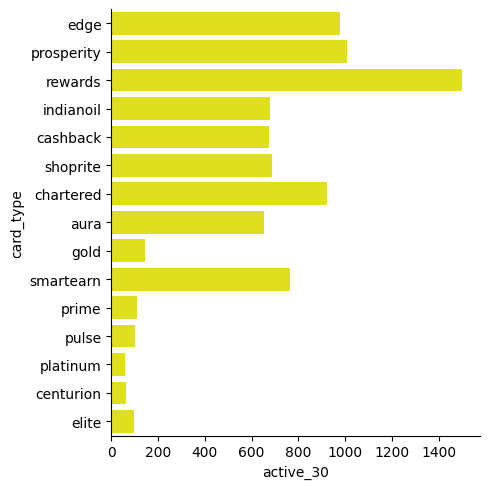

In [25]:
sns.catplot(df,y=df.card_type,x=df.active_30,kind='bar',errorbar=None,estimator='count', palette=['yellow'])

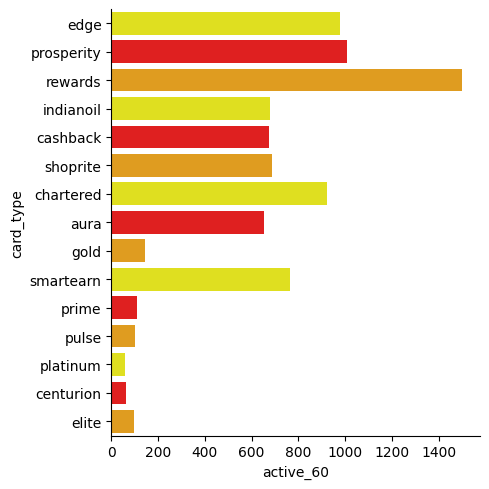

In [26]:
sns.catplot(df,y=df.card_type,x=df.active_60,kind='bar',errorbar=None,estimator='count', palette=['yellow','red','orange'])

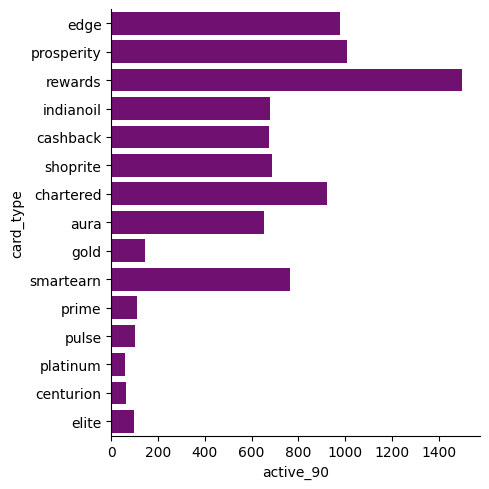

In [27]:
sns.catplot(df,y=df.card_type,x=df.active_90,kind='bar',errorbar=None,estimator='count', palette=['purple'])

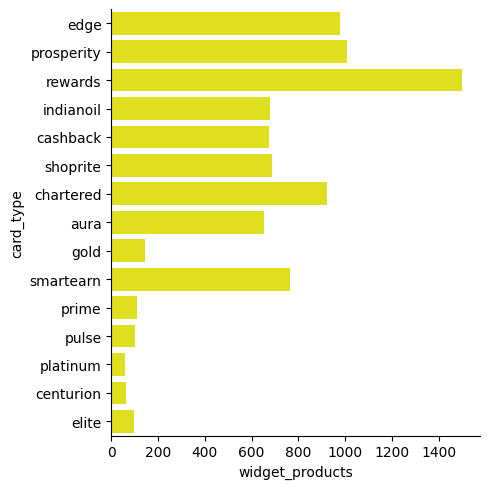

In [28]:
sns.catplot(df,y=df.card_type,x=df.widget_products,kind='bar',errorbar=None,estimator='count', palette=['yellow'])

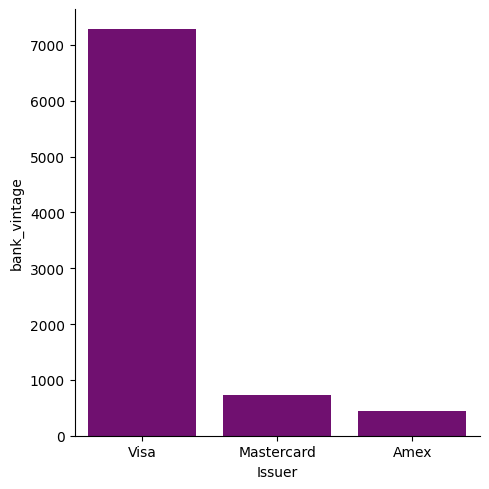

In [29]:
sns.catplot(df,x=df.Issuer,y=df.bank_vintage ,kind='bar',errorbar=None,estimator='count', palette=['purple'])

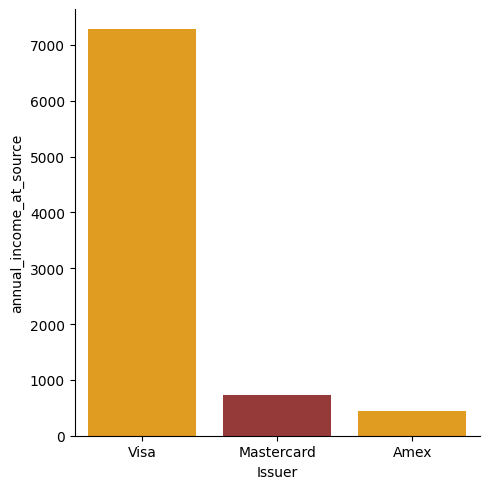

In [30]:
sns.catplot(df,x=df.Issuer,y=df.annual_income_at_source,kind='bar',errorbar=None,estimator='count', palette=['orange','brown'])

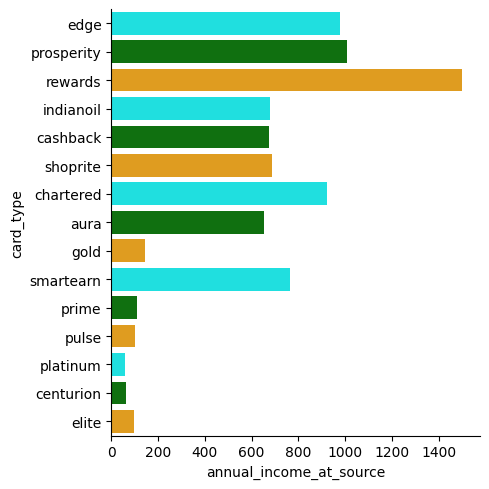

In [31]:
sns.catplot(df,y=df.card_type,x=df.annual_income_at_source,kind='bar',errorbar=None,estimator='count', palette=['cyan','green','orange'])

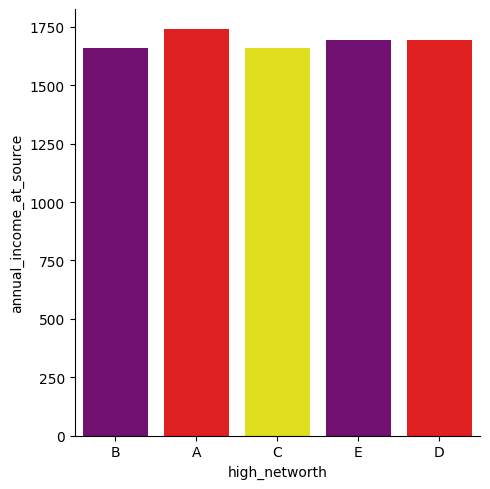

In [32]:
sns.catplot(df,x=df.high_networth,y=df.annual_income_at_source,kind='bar',errorbar=None,estimator='count', palette=['purple','red','yellow'])

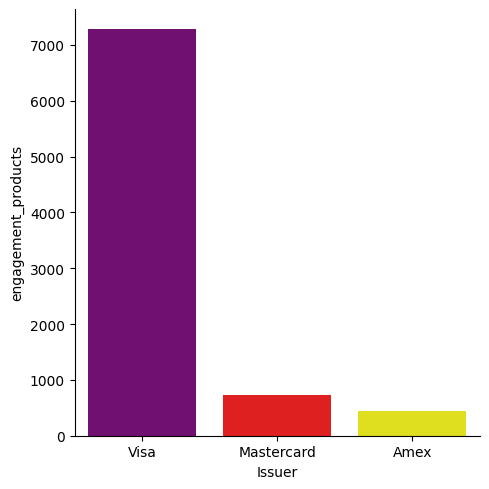

In [33]:
sns.catplot(df,y=df.engagement_products,x=df.Issuer,kind='bar',errorbar=None,estimator='count', palette=['purple','red','yellow'])

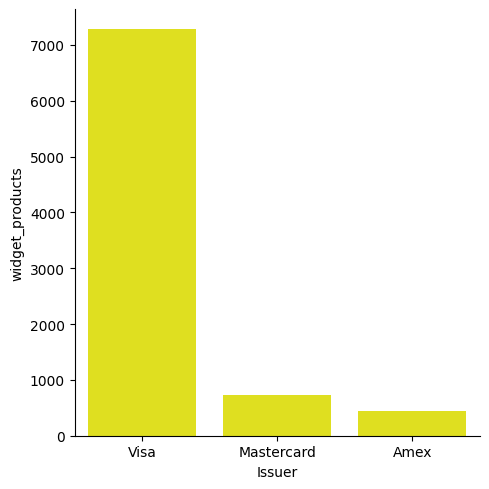

In [34]:
sns.catplot(df,x=df.Issuer,y=df.widget_products,kind='bar',errorbar=None,estimator='count', palette=['yellow'])

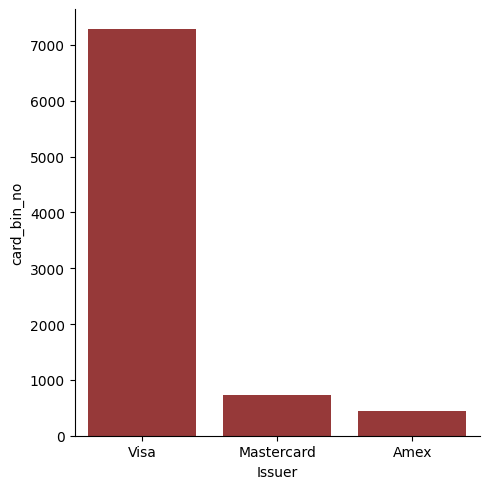

In [35]:
sns.catplot(df,x=df.Issuer,y=df.card_bin_no,kind='bar',errorbar=None,estimator='count', palette=['brown'])

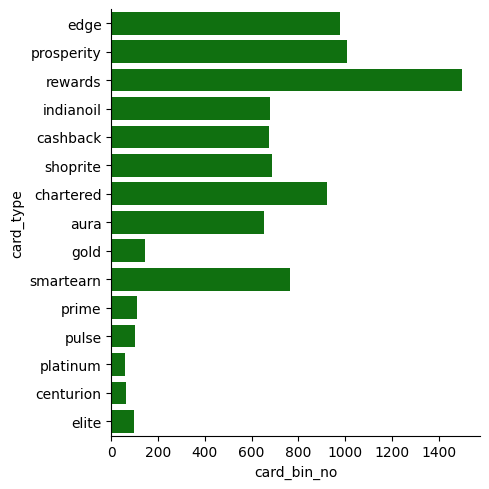

In [36]:
sns.catplot(df,y=df.card_type,x=df.card_bin_no,kind='bar',errorbar=None,estimator='count', palette=['green'])

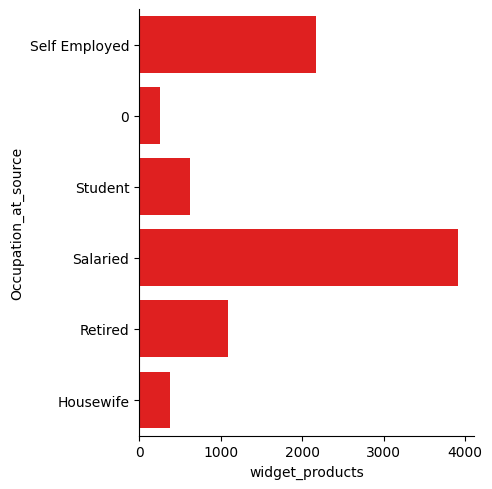

In [37]:
sns.catplot(df,y=df.Occupation_at_source,x=df.widget_products,kind='bar',errorbar=None,estimator='count', palette=['red'])

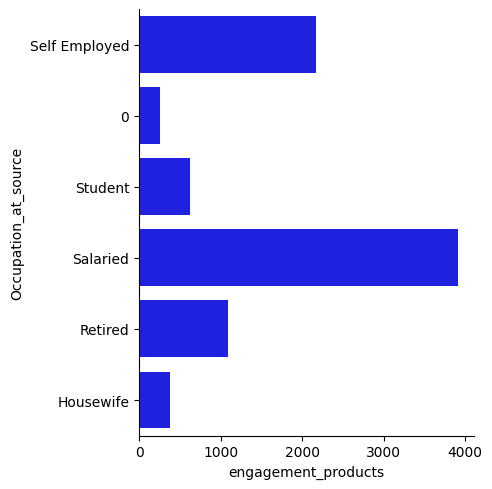

In [38]:
sns.catplot(df,y=df.Occupation_at_source,x=df.engagement_products,kind='bar',errorbar=None,estimator='count', palette=['blue'])

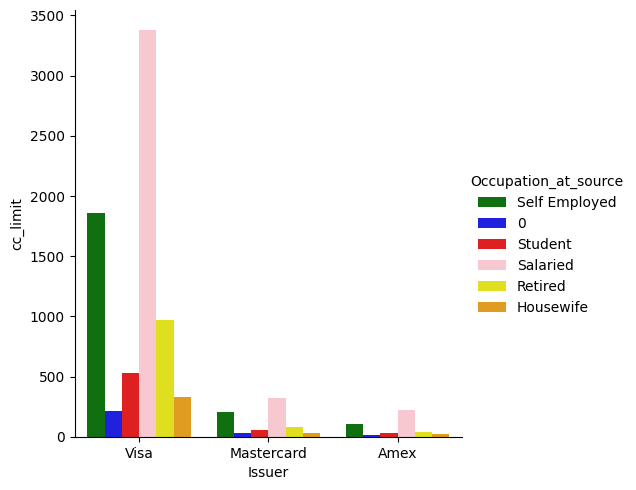

In [39]:
sns.catplot(df,x=df.Issuer,y=df.cc_limit,hue=df.Occupation_at_source,kind='bar',errorbar=None,estimator='count', palette=['green', 'blue','red','pink','yellow','orange'])

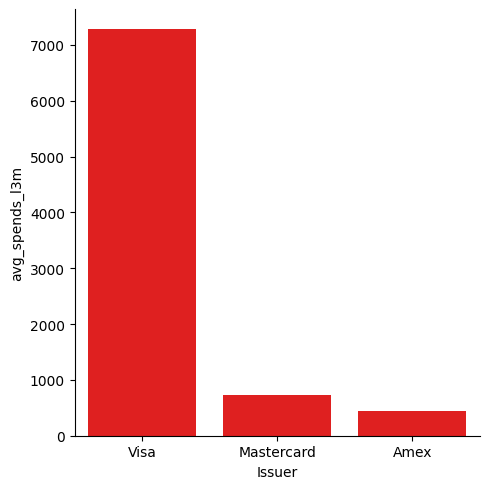

In [40]:
sns.catplot(df,x=df.Issuer,y=df.avg_spends_l3m ,kind='bar',errorbar=None,estimator='count', palette=['red'])

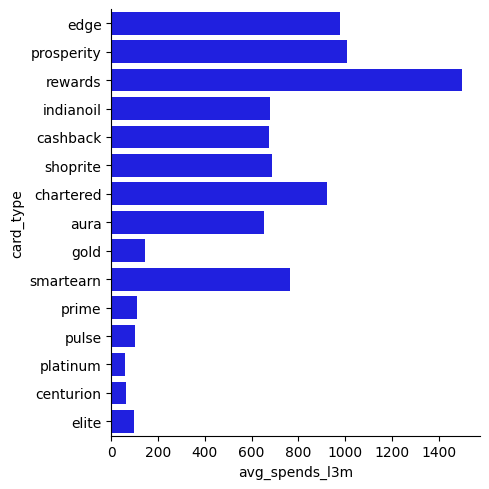

In [41]:
sns.catplot(df,y=df.card_type,x=df.avg_spends_l3m ,kind='bar',errorbar=None,estimator='count', palette=['blue'])

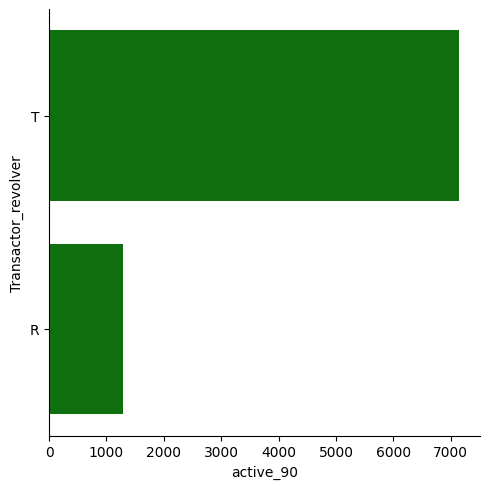

In [42]:
sns.catplot(df,x=df.active_90,y=df.Transactor_revolver ,kind='bar',errorbar=None,estimator='count', palette=['green'])

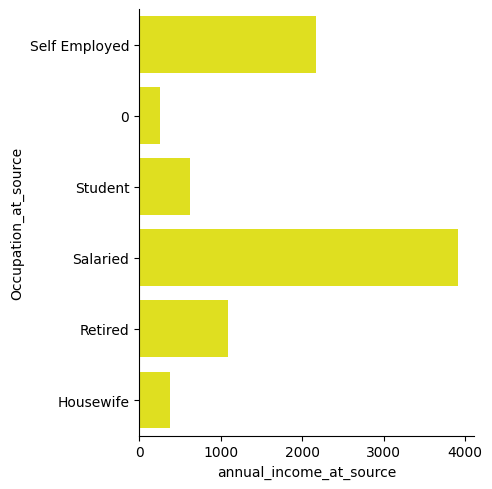

In [43]:
sns.catplot(df,y=df.Occupation_at_source,x=df.annual_income_at_source ,kind='bar',errorbar=None,estimator='count', palette=['yellow'])

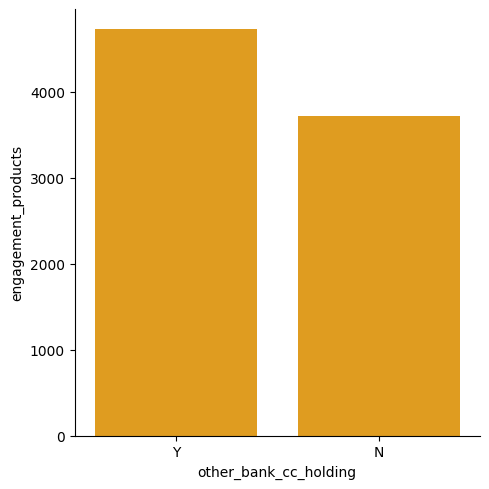

In [44]:
sns.catplot(df,y=df.engagement_products,x=df.other_bank_cc_holding,kind='bar',errorbar=None,estimator='count', palette=['orange'])

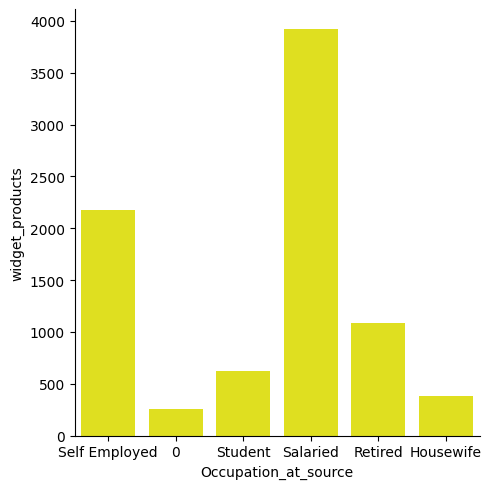

In [45]:
sns.catplot(df,y=df.widget_products ,x=df.Occupation_at_source,kind='bar',errorbar=None,estimator='count', palette=['yellow'])

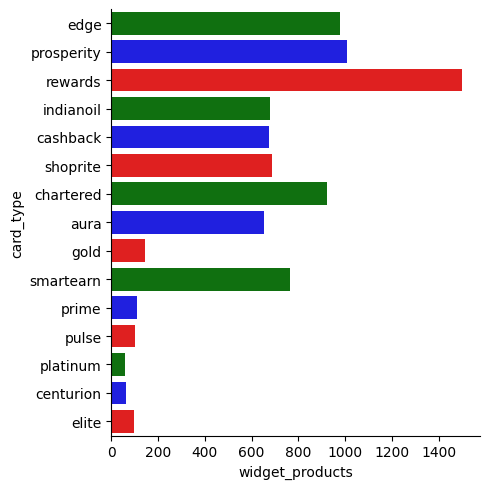

In [46]:
sns.catplot(df,y=df.card_type,x=df.widget_products ,kind='bar',errorbar=None,estimator='count', palette=['green', 'blue','red'])

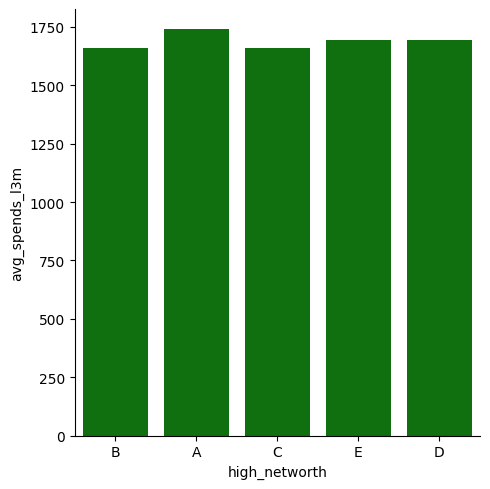

In [49]:
sns.catplot(df,y=df.avg_spends_l3m,x=df.high_networth ,kind='bar',errorbar=None,estimator='count', palette=['green'])

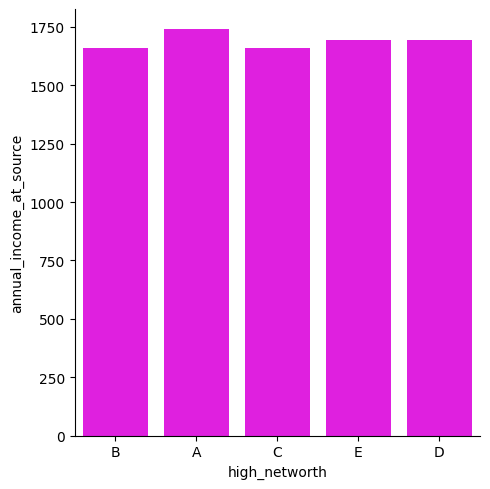

In [51]:
sns.catplot(df,y=df.annual_income_at_source ,x=df.high_networth ,kind='bar',errorbar=None,estimator='count', palette=['magenta'])